In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import filehandling
import os

In [25]:
%matplotlib auto

Using matplotlib backend: Qt5Agg


In [35]:
parent_direc = "/media/data/Data/BallBearing/HIPS/PhaseDiagramsNewPlate/2,10mm"

In [36]:
density_direcs = filehandling.list_files(parent_direc+'/*')

In [37]:
figure_data = {}

In [38]:
threshold = 0.8
for direc in density_direcs:
    density = direc[-3:]
    files = filehandling.list_files(direc+'/*.hdf5')
    def get_duty(f):
        duty = int(os.path.splitext(f)[0][-3:])
        return duty
    duties = list(map(get_duty, files))

    def get_ordered_percent(f):
        data = pd.read_hdf(f)
        order = np.abs(data.hexatic_order)
        ordered = order > threshold
        percent = np.sum(ordered) / len(ordered)
        return percent
    ordered_percentage = list(map(get_ordered_percent, files))
    figure_data[density] = (duties, ordered_percentage)
#     plt.plot(duties, ordered_percentage, label=density)
# plt.legend()

Text(0, 0.5, '$\\psi_6>0.8 \\% $')

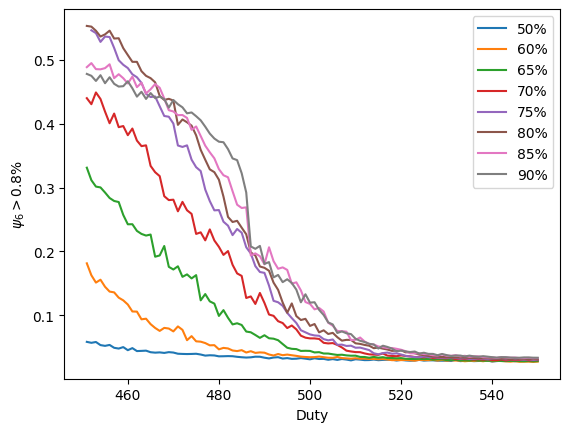

In [39]:
plt.figure()
for density, (duty, percent_crystal) in figure_data.items():
    plt.plot(duty, percent_crystal, label=density)
plt.legend()
plt.xlabel('Duty')
plt.ylabel('$\psi_6>0.8 \% $')

In [33]:
figure_data2 = {}

def get_duty(f):
    duty = int(os.path.splitext(f)[0][-3:])
    return duty

def get_order(f):
        data = pd.read_hdf(f)
        order = np.abs(data.hexatic_order)
        return np.mean(order)

for direc in density_direcs:
    density = direc[-3:]
    files = filehandling.list_files(direc+'/*.hdf5')

    duties = list(map(get_duty, files))

    
    order = list(map(get_order, files))
    figure_data[density] = (duties, order)
#     plt.plot(duties, ordered_percentage, label=density)
# plt.legend()